<a href="https://colab.research.google.com/github/oyhenart/IAO-Football-Analytics/blob/main/notebooks/Scatter_plot_flechas_pases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Análisis de pases - Scatter plot con flechas
Este notebook muestra un análisis de los pases de los jugadores en un partido, utilizando un mapa de dispersión donde cada flecha representa un pase.

**Objetivos:**
- Visualizar la dirección y distancia de los pases.
- Identificar patrones de juego.
- Generar visualizaciones claras y profesionales usando `matplotlib` y `mplsoccer`.


# 1️⃣ Preparación de datos


## 1.1 Cargar datos

In [ ]:
'''
Repositorio de donde saco la data
https://github.com/statsbomb/open-data

Instalamos las librerías necesarias
'''
!pip install statsbombpy
!pip install mplsoccer
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Importamos librerias necesarias
from statsbombpy import sb
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch

## 1.2 Limpiamos los datos

In [ ]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-09-28T20:46:38.893391,2025-07-06T04:26:07.636270,2025-07-06T04:26:07.636270,2024-09-28T20:46:38.893391
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-09-28T01:57:35.846538,None,None,2024-09-28T01:57:35.846538
3,16,4,Europe,Champions League,male,False,False,2018/2019,2025-05-08T15:10:50.835274,2021-06-13T16:17:31.694,None,2025-05-08T15:10:50.835274
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,315,Europe,UEFA Women's Euro,female,False,True,2025,2025-07-28T14:19:20.467348,2025-07-29T16:03:07.355174,2025-07-29T16:03:07.355174,2025-07-28T14:19:20.467348
72,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
73,72,107,International,Women's World Cup,female,False,True,2023,2025-07-14T10:07:06.620906,2025-07-14T10:10:27.224586,2025-07-14T10:10:27.224586,2025-07-14T10:07:06.620906


In [ ]:
sb.matches(competition_id=43, season_id=106).sort_values(by='match_date')

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
35,3857286,2022-11-20,18:00:00.000,International - FIFA World Cup,2022,Qatar,Ecuador,0,2,available,...,2023-07-25T07:19:21.209321,1,Group Stage,Al Bayt Stadium,Daniele Orsato,Félix Sánchez Bas,Gustavo Julio Alfaro,1.1.0,2,2
57,3857271,2022-11-21,15:00:00.000,International - FIFA World Cup,2022,England,Iran,6,2,available,...,2023-06-18T15:37:14.539174,1,Group Stage,Sheikh Khalifa International Stadium,Raphael Claus,Gareth Southgate,Carlos Manuel Brito Leal Queiróz,1.1.0,2,2
46,3857285,2022-11-21,18:00:00.000,International - FIFA World Cup,2022,Senegal,Netherlands,0,2,available,...,2023-06-20T10:37:16.264240,1,Group Stage,Al Thumama Stadium,Wilton Pereira Sampaio,Aliou Cissé,Louis van Gaal,1.1.0,2,2
34,3857282,2022-11-21,21:00:00.000,International - FIFA World Cup,2022,United States,Wales,1,1,available,...,2023-07-25T09:10:59.976019,1,Group Stage,Ahmad bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,Gregg Berhalter,Robert Page,1.1.0,2,2
63,3857254,2022-11-22,15:00:00.000,International - FIFA World Cup,2022,Denmark,Tunisia,0,0,available,...,2023-07-29T19:44:56.738444,1,Group Stage,Education City Stadium,César Arturo Ramos Palazuelos,Kasper Hjulmand,Jalel Kadri,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,3869486,2022-12-10,17:00:00.000,International - FIFA World Cup,2022,Morocco,Portugal,1,0,available,...,2023-04-26T23:03:02.645780,5,Quarter-finals,Al Thumama Stadium,Facundo Tello Figueroa,Hoalid Regragui,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
19,3869519,2022-12-13,21:00:00.000,International - FIFA World Cup,2022,Argentina,Croatia,3,0,available,...,2023-04-26T22:32:37.808359,6,Semi-finals,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Zlatko Dalić,1.1.0,2,2
21,3869552,2022-12-14,21:00:00.000,International - FIFA World Cup,2022,France,Morocco,2,0,available,...,2023-04-26T22:30:45.010084,6,Semi-finals,Al Bayt Stadium,César Arturo Ramos Palazuelos,Didier Deschamps,Hoalid Regragui,1.1.0,2,2
18,3869684,2022-12-17,17:00:00.000,International - FIFA World Cup,2022,Croatia,Morocco,2,1,available,...,2023-04-26T22:18:59.308194,7,3rd Place Final,Sheikh Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Zlatko Dalić,Hoalid Regragui,1.1.0,2,2


In [ ]:
partido = sb.events(match_id=3869685)

In [ ]:
partido.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [ ]:
partido.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,771,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN


In [ ]:
partido.player.value_counts()

,count
player,
Enzo Fernandez,328
Rodrigo Javier De Paul,242
Lionel Andrés Messi Cuccittini,242
Nicolás Hernán Otamendi,215
Jules Koundé,211
Aurélien Djani Tchouaméni,205
Cristian Gabriel Romero,203
Dayotchanculle Upamecano,198
Alexis Mac Allister,196


In [ ]:
enzo_fernandez = partido[partido['player'] == 'Enzo Fernandez']

In [ ]:
enzo_fernandez[['x', 'y']] = enzo_fernandez['location'].apply(pd.Series)
enzo_fernandez[['x', 'y', 'location']]

/tmp/ipython-input-3985444488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enzo_fernandez[['x', 'y']] = enzo_fernandez['location'].apply(pd.Series)
/tmp/ipython-input-3985444488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enzo_fernandez[['x', 'y']] = enzo_fernandez['location'].apply(pd.Series)


,x,y,location
48,54.8,37.8,"[54.8, 37.8]"
70,56.5,39.7,"[56.5, 39.7]"
102,34.3,50.2,"[34.3, 50.2]"
107,88.0,23.9,"[88.0, 23.9]"
128,33.9,51.1,"[33.9, 51.1]"
...,...,...,...
4333,35.8,21.1,"[35.8, 21.1]"
4343,5.0,71.2,"[5.0, 71.2]"
4344,5.2,64.8,"[5.2, 64.8]"
4345,6.2,58.6,"[6.2, 58.6]"


## 1.3 Exploración inicial

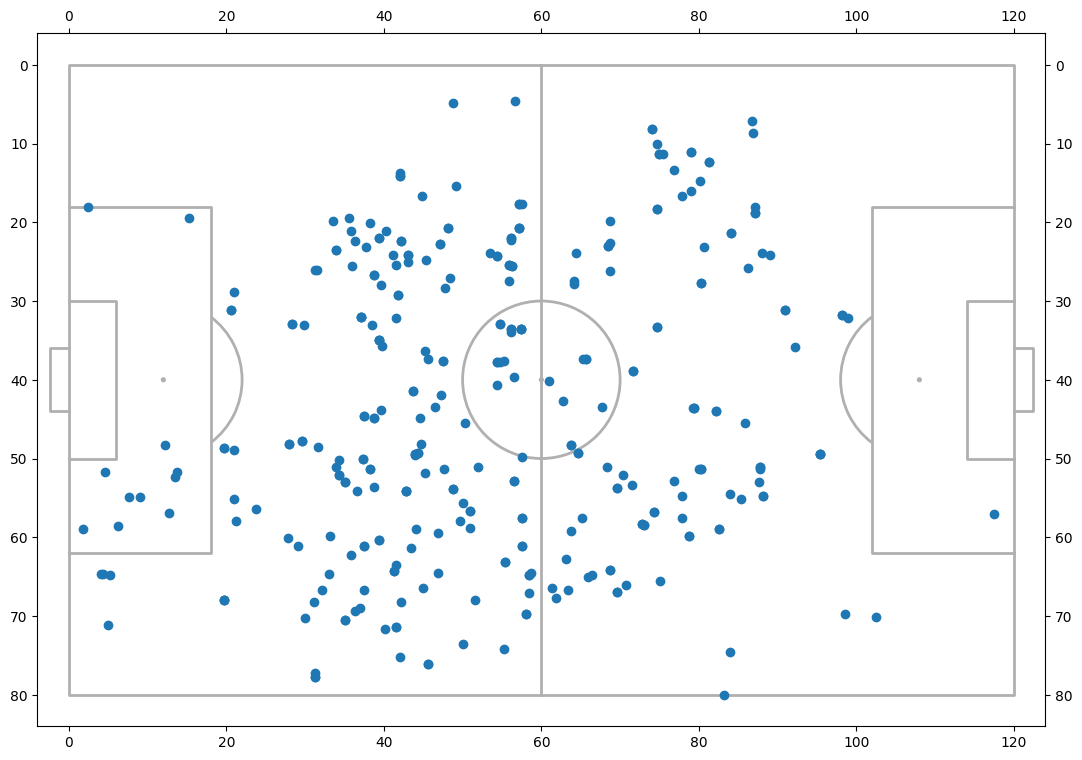

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
pitch = Pitch(
    pitch_type='statsbomb',
    axis = True,
    label = True,
    tick = True,
    goal_type = 'box'
)

pitch.draw(ax=ax)

pitch.scatter(enzo_fernandez['x'], enzo_fernandez['y'], ax=ax)

In [ ]:
enzo_fernandez.type.value_counts()

,count
type,
Pass,94
Ball Receipt*,86
Carry,73
Pressure,30
Duel,11
Ball Recovery,8
Dribbled Past,7
Clearance,4
Foul Committed,4


In [ ]:
partido.type.value_counts()

,count
type,
Pass,1263
Ball Receipt*,1114
Carry,940
Pressure,361
Ball Recovery,115
Duel,98
Dribble,54
Block,50
Foul Committed,48


In [ ]:
partido.pass_type.value_counts()
partido.shot_type.value_counts()

,count
shot_type,
Open Play,27
Penalty,11


# 2️⃣ Visualización de pases


## 2.1 Crear el campo de fútbol

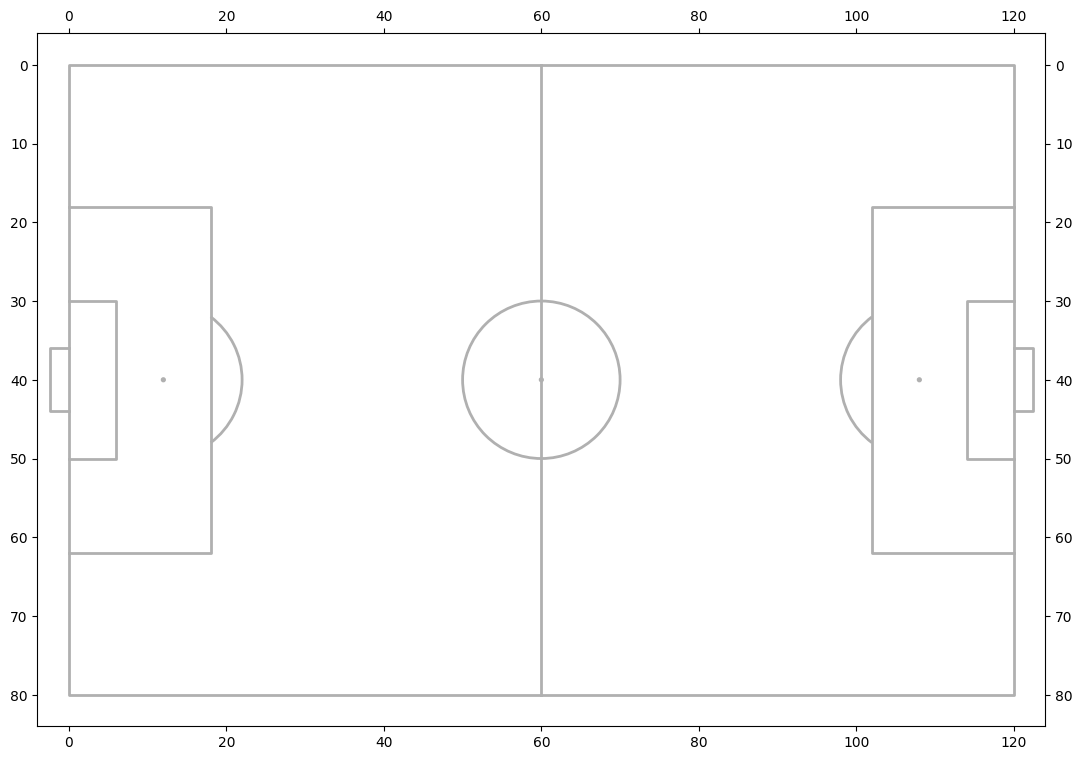

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
pitch = Pitch(
    pitch_type='statsbomb',
    axis = True,
    label = True,
    tick = True,
    goal_type = 'box'
)

pitch.draw(ax=ax)

## 2.2 Crear dataframe para Jugador

In [ ]:
enzo_fernandez.type.value_counts()

,count
type,
Pass,94
Ball Receipt*,86
Carry,73
Pressure,30
Duel,11
Ball Recovery,8
Dribbled Past,7
Clearance,4
Foul Committed,4


In [ ]:
pases_enzo_fernandez = enzo_fernandez[enzo_fernandez['type'] == 'Pass']
pases_enzo_fernandez.columns

pases_enzo_fernandez[['location', 'pass_end_location']]
pases_enzo_fernandez[['x', 'y']] = pases_enzo_fernandez['location'].apply(pd.Series)
pases_enzo_fernandez[['x_end', 'y_end']] = pases_enzo_fernandez['pass_end_location'].apply(pd.Series)

pases_enzo_fernandez[['x', 'y', 'x_end', 'y_end']]

/tmp/ipython-input-544508556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases_enzo_fernandez[['x', 'y']] = pases_enzo_fernandez['location'].apply(pd.Series)
/tmp/ipython-input-544508556.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases_enzo_fernandez[['x_end', 'y_end']] = pases_enzo_fernandez['pass_end_location'].apply(pd.Series)
/tmp/ipython-input-544508556.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,x,y,x_end,y_end
48,54.8,37.8,56.5,60.5
70,56.5,39.7,66.4,42.9
102,34.3,50.2,38.8,53.4
107,88.0,23.9,93.7,20.3
128,33.9,51.1,112.1,58.1
...,...,...,...,...
1235,82.6,59.0,82.0,74.0
1238,79.2,43.6,94.6,21.1
1241,83.2,80.0,96.3,76.3
1261,64.2,27.8,74.1,34.6


In [ ]:
enzo_fernandez.columns
enzo_fernandez.pass_outcome.value_counts()
enzo_fernandez.pass_outcome.fillna('Complete')
enzo_fernandez.pass_outcome.value_counts()

,count
pass_outcome,
Incomplete,13
Unknown,2


## 2.3 Dibujar pases con flechas y estética de la cancha

Text(0.5, 1.0, 'Pases de Enzo Fernandez en la Final del Mundo')

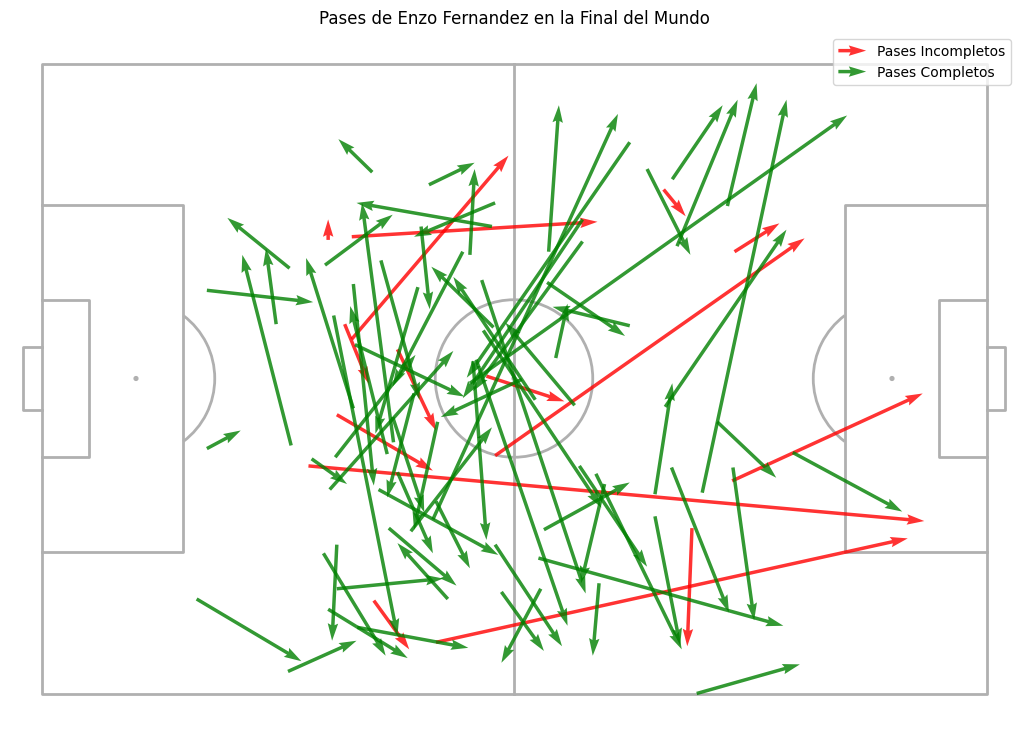

In [ ]:
from pathlib import WindowsPath
fig, ax = plt.subplots(figsize=(16, 9))
pitch = Pitch(
    pitch_type='statsbomb',
    goal_type = 'box'
)

pitch.draw(ax=ax)

pases_incompletos = pases_enzo_fernandez[pases_enzo_fernandez['pass_outcome'].isin(['Unknown', 'Incomplete'])]
pases_completos = pases_enzo_fernandez[~pases_enzo_fernandez['pass_outcome'].isin(['Unknown', 'Incomplete'])]

pitch.arrows(
    pases_incompletos['x'], pases_incompletos['y'],
    pases_incompletos['x_end'], pases_incompletos['y_end'],
    ax=ax,
    label = 'Pases Incompletos',
    color = 'red',
    alpha = 0.8,
    width = 2.5
    )
pitch.arrows(pases_completos['x'], pases_completos['y'], pases_completos['x_end'], pases_completos['y_end'], ax=ax, label = 'Pases Completos', color = 'green', alpha = 0.8, width = 2.5)


plt.legend()
plt.title('Pases de Enzo Fernandez en la Final del Mundo')

# 3️⃣ Guardar imagen


In [ ]:
# Save the figure to a file
plt.savefig('enzo_fernandez_passes.png')

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/mapa_pases.png'

<Figure size 640x480 with 0 Axes>

# 4️⃣ Conclusiones

A partir del análisis de los pases realizados en el partido, podemos extraer los siguientes insights:

- ⚡ Se observan patrones de pase predominantes hacia la banda derecha del campo.
- 🔄 Algunos jugadores muestran una tendencia a realizar pases cortos consecutivos, formando combinaciones.
- 🎯 Los pases largos y diagonales suelen concentrarse en momentos de transición rápida al ataque.
- 🛡️ Se identifican zonas donde se pierden más balones, lo que podría indicar áreas de mejora defensiva.
- 📊 El mapa de flechas permite visualizar claramente la dirección, longitud y frecuencia de los pases de cada jugador.